In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from ISLP import load_data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import (dendrogram, cut_tree)
from ISLP.cluster import compute_linkage

In [2]:
USArrests = pd.DataFrame(get_rdataset('USArrests').data).reset_index()

In [3]:
USArrests.columns=['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [4]:
states=USArrests["State"]

In [5]:
label=LabelEncoder()
country_label=label.fit_transform(USArrests['State'])

In [6]:
USArrests["State"]=country_label

In [7]:
USArrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


In [8]:
states_dict=dict(zip(states, USArrests["State"]))

In [9]:
X=USArrests.drop("State", axis=1)
y=USArrests["State"]

In [10]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(pd.DataFrame(y))

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


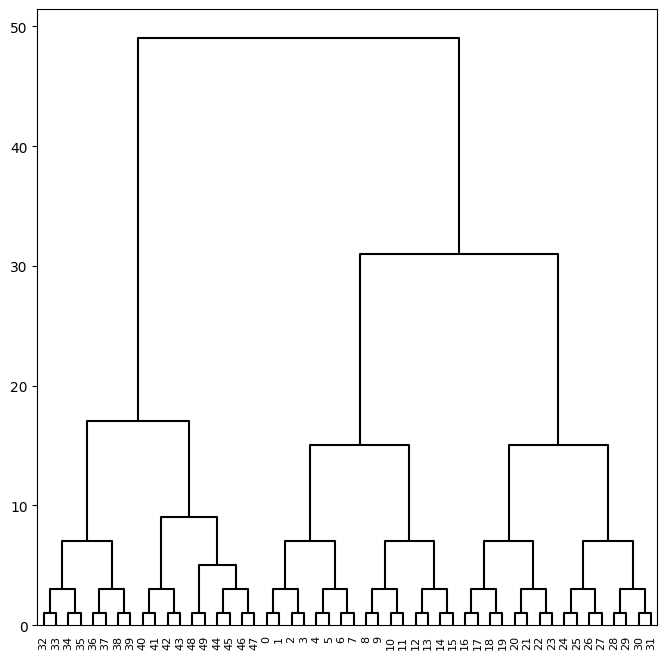

In [11]:
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

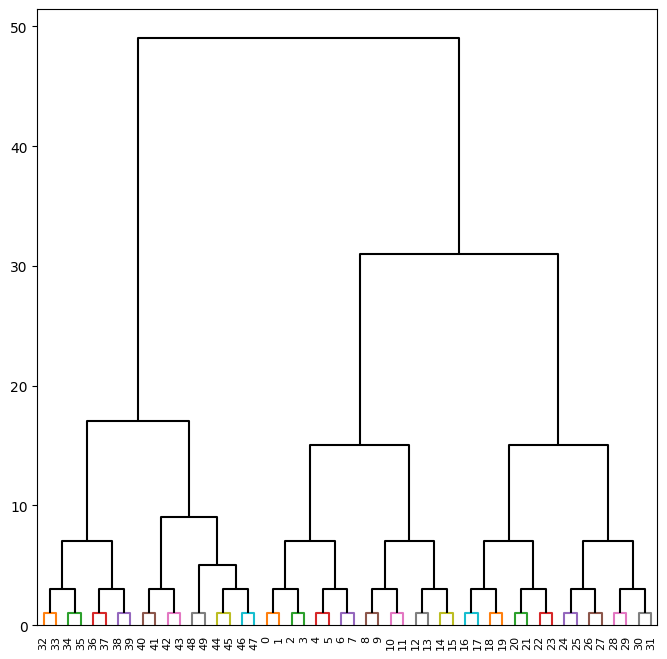

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=3, above_threshold_color='black');

In [13]:
cut_tree(linkage_comp, n_clusters=3).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]])

In [14]:
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(pd.DataFrame(y))

In [15]:
hc_comp.fit(pd.DataFrame(USArrests_scaled))

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


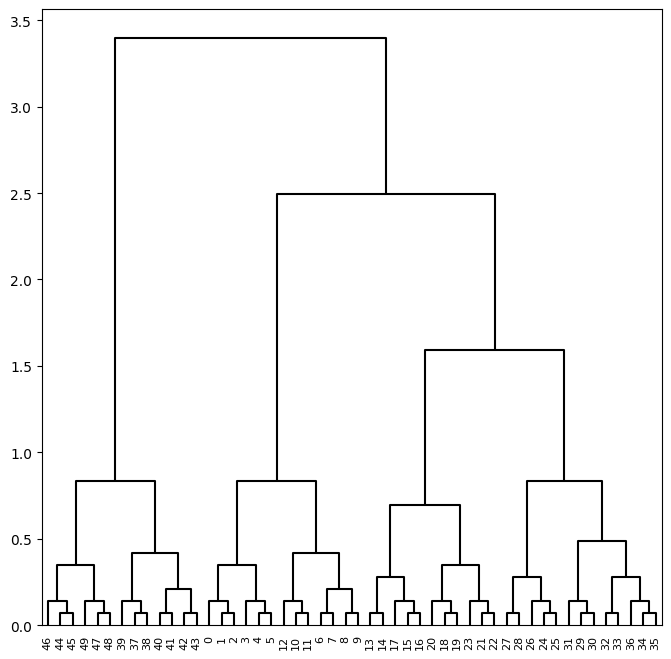

In [16]:
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

In [17]:
states_dict

{'Alabama': 0,
 'Alaska': 1,
 'Arizona': 2,
 'Arkansas': 3,
 'California': 4,
 'Colorado': 5,
 'Connecticut': 6,
 'Delaware': 7,
 'Florida': 8,
 'Georgia': 9,
 'Hawaii': 10,
 'Idaho': 11,
 'Illinois': 12,
 'Indiana': 13,
 'Iowa': 14,
 'Kansas': 15,
 'Kentucky': 16,
 'Louisiana': 17,
 'Maine': 18,
 'Maryland': 19,
 'Massachusetts': 20,
 'Michigan': 21,
 'Minnesota': 22,
 'Mississippi': 23,
 'Missouri': 24,
 'Montana': 25,
 'Nebraska': 26,
 'Nevada': 27,
 'New Hampshire': 28,
 'New Jersey': 29,
 'New Mexico': 30,
 'New York': 31,
 'North Carolina': 32,
 'North Dakota': 33,
 'Ohio': 34,
 'Oklahoma': 35,
 'Oregon': 36,
 'Pennsylvania': 37,
 'Rhode Island': 38,
 'South Carolina': 39,
 'South Dakota': 40,
 'Tennessee': 41,
 'Texas': 42,
 'Utah': 43,
 'Vermont': 44,
 'Virginia': 45,
 'Washington': 46,
 'West Virginia': 47,
 'Wisconsin': 48,
 'Wyoming': 49}